In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings
import matplotlib as plt
import FinanceDataReader as fdr

warnings.filterwarnings("ignore")
plt.rc('font', family='Pretendard')
pd.options.display.float_format = '{:.4f}'.format

In [4]:
CSI300 = pd.read_excel('../000300perf_0531.xlsx', engine='openpyxl')
CSI300.set_index("日期Date", inplace=True)
CSI300.rename(columns={"收盘Close": "CSI300"}, inplace=True)
CSI300 = CSI300.rename_axis("Date")
CSI300 = CSI300['CSI300']

# Convert the index to datetime format
CSI300.index = pd.to_datetime(CSI300.index, format='%Y%m%d')
CSI300 = CSI300.to_frame()

In [8]:
# Date range
start = '2010-01-01'
end = '2023-05-31'

# Tickers of assets
ticker_labes = {
    'ticker': ['^KS200', '229200.KS', '^GSPC', '^STOXX50E', '^N225', '000300.SS', '148070.KS', '136340.KS', 'HYG', 'GC=F', 'CL=F', '114800.KS', '138230.KS', '139660.KS', '130730.KS'],
    'labels': ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
}

# Downloading data
data = yf.download(ticker_labes['ticker'], start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]

column_names = data.columns
matched_columns = [(label, ticker_labes['labels'][ticker_labes['ticker'].index(ticker)]) for label, ticker in column_names]

# Convert matched_columns to a pandas MultiIndex
matched_columns = pd.MultiIndex.from_tuples(matched_columns)

# Assign the matched columns to the prices dataframe
data.columns = matched_columns
data.columns = data.columns.droplevel(level=0)

data = data.drop('CSI300', axis=1)
data = data.merge(CSI300[['CSI300']], left_index=True, right_index=True, how='left')

# Print the merged DataFrame
data = data.sort_index(axis=1)
data = data.dropna()

[*********************100%***********************]  15 of 15 completed


In [12]:
# Date range
start = '2010-01-01'
end = '2023-05-31'

# Tickers of assets
ticker_labels = {
    'ticker': ['^KS200', '229200.KS', '^GSPC', '^STOXX50E', '^N225', '000300.SS', '148070.KS', '136340.KS', 'HYG', 'GC=F', 'CL=F', '114800.KS', '138230.KS', '139660.KS', '130730.KS'],
    'labels': ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
}

new_dict = dict(zip(ticker_labels["ticker"], ticker_labels["labels"]))

# Downloading data
data = yf.download(ticker_labels['ticker'], start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data = data.rename(columns=new_dict)

data.columns = data.columns.droplevel(level=0)
data = data.drop('CSI300', axis=1)
data = data.merge(CSI300[['CSI300']], left_index=True, right_index=True, how='left')

# Print the merged DataFrame
data = data.sort_index(axis=1)
data = data.dropna()

assets = data.columns

[*********************100%***********************]  15 of 15 completed


In [13]:
# Calculating returns
Y = data.pct_change()
Y = Y.dropna()
display(Y.head())

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
Date,,,,,,,,,,,,,,,
2015-10-14,0.0333,-0.0124,-0.0044,-0.0006,0.0002,-0.0138,-0.0095,-0.0104,-0.0095,0.0093,-0.0564,-0.0028,0.0309,-0.0001,-0.0048
2015-10-15,0.0237,0.0082,0.0120,-0.0134,0.0002,0.0115,0.0149,0.0148,-0.0130,0.0138,-0.0056,0.0051,0.0066,0.0009,0.0024
2015-10-16,0.0136,0.0148,-0.0021,0.0019,0.0000,0.0108,0.0046,0.0081,-0.0017,0.0018,0.0190,-0.0005,-0.0036,-0.0006,0.0046
2015-10-19,0.0000,-0.0009,0.0004,0.0018,0.0000,-0.0088,0.0003,0.0022,-0.0077,0.0091,-0.0290,-0.0008,-0.0087,0.0002,0.0027
2015-10-21,-0.0172,0.0057,0.0072,-0.0074,-0.0002,0.0233,-0.0072,0.0001,0.0090,-0.0108,-0.0150,-0.0036,-0.0049,0.0000,-0.0001


Text(0.5, 1.0, 'ETF Time Series 2015 - 2023')

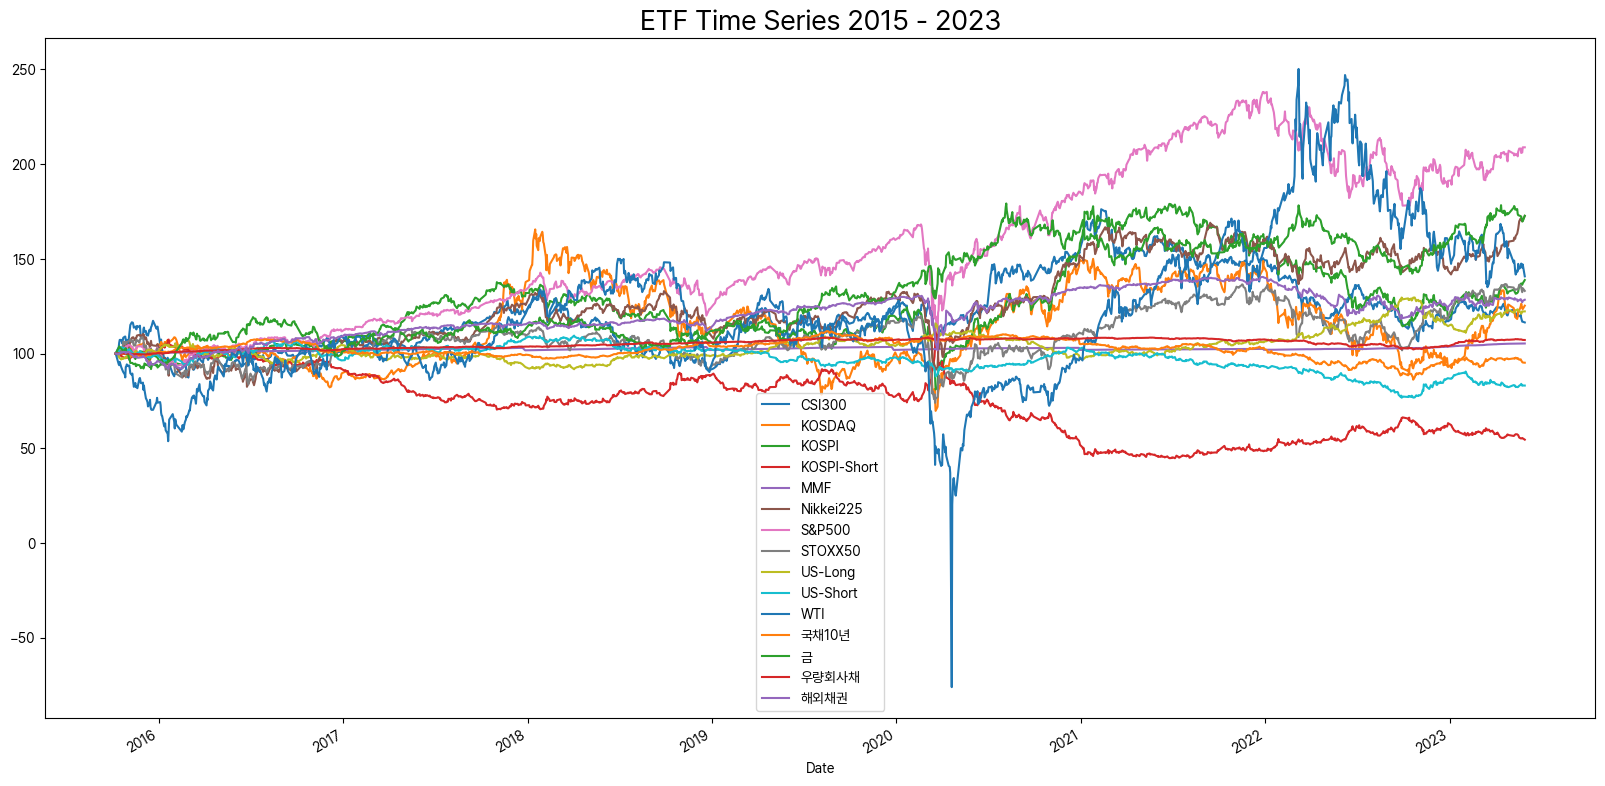

In [14]:
import matplotlib.pyplot as plt
normalised = data / data.iloc[0] * 100
normalised.plot(figsize=(20, 10))
plt.title('ETF Time Series 2015 - 2023', fontsize=20)

In [15]:
corr = Y.corr()
corr.head(10)

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
CSI300,1.0000,0.3242,0.3986,-0.4106,0.0116,0.3453,0.2090,0.2408,-0.3393,0.3235,0.0609,-0.0823,0.0476,-0.0481,0.1617
KOSDAQ,0.3242,1.0000,0.6578,-0.6706,-0.0633,0.4796,0.2293,0.2929,-0.4164,0.4021,0.0487,0.0120,0.0737,0.0896,0.2185
KOSPI,0.3986,0.6578,1.0000,-0.9865,0.0277,0.6455,0.2921,0.4186,-0.5595,0.5526,0.0656,-0.0064,0.0634,0.0538,0.2885
KOSPI-Short,-0.4106,-0.6706,-0.9865,1.0000,0.0260,-0.6436,-0.3060,-0.4243,0.5641,-0.5574,-0.0719,0.0203,-0.0737,-0.0537,-0.2983
MMF,0.0116,-0.0633,0.0277,0.0260,1.0000,-0.0217,-0.0361,0.0081,0.0555,-0.0246,-0.0037,0.2365,-0.0359,0.0340,-0.0228
Nikkei225,0.3453,0.4796,0.6455,-0.6436,-0.0217,1.0000,0.2428,0.4354,-0.3659,0.3505,0.0732,-0.1402,-0.0756,-0.0743,0.1994
S&P500,0.2090,0.2293,0.2921,-0.3060,-0.0361,0.2428,1.0000,0.6202,-0.1508,0.1504,0.1435,-0.0322,0.0450,0.0004,0.7763
STOXX50,0.2408,0.2929,0.4186,-0.4243,0.0081,0.4354,0.6202,1.0000,-0.2455,0.2392,0.0964,-0.0404,-0.0613,-0.0063,0.5480
US-Long,-0.3393,-0.4164,-0.5595,0.5641,0.0555,-0.3659,-0.1508,-0.2455,1.0000,-0.9721,-0.0356,-0.0751,-0.1424,-0.1248,-0.1853
US-Short,0.3235,0.4021,0.5526,-0.5574,-0.0246,0.3505,0.1504,0.2392,-0.9721,1.0000,0.0291,0.0900,0.1381,0.1293,0.1841


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

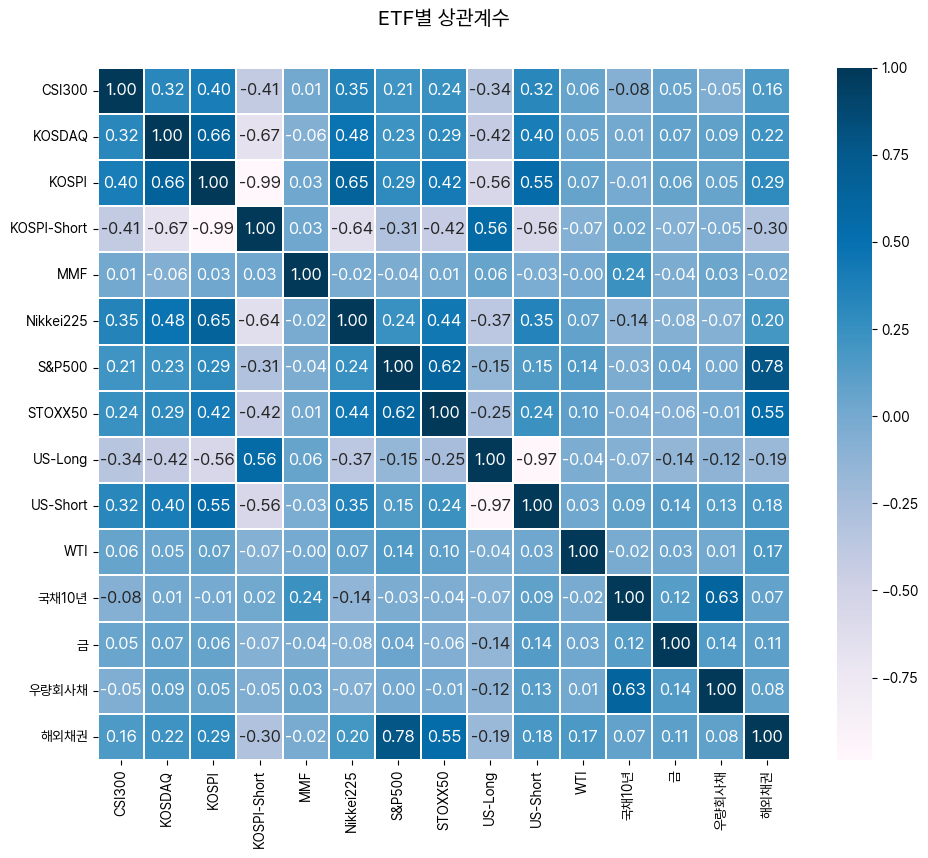

In [17]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("ETF별 상관계수", y = 1.05, size = 15)
plt.tight_layout()
ax = sns.heatmap(Y.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 12})

# Loop over the annotations and format them with two decimal places
for text in ax.texts:
    if text.get_text() != '':
        value = float(text.get_text())
        text.set_text(f"{value:.2f}")

In [18]:
idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:15]

(S&P500, 해외채권)           0.7763
(KOSDAQ, KOSPI)          0.6578
(KOSPI, Nikkei225)       0.6455
(국채10년, 우량회사채)           0.6342
(S&P500, STOXX50)        0.6202
(KOSPI-Short, US-Long)   0.5641
(KOSPI, US-Short)        0.5526
(STOXX50, 해외채권)          0.5480
(KOSDAQ, Nikkei225)      0.4796
(Nikkei225, STOXX50)     0.4354
(KOSPI, STOXX50)         0.4186
(KOSDAQ, US-Short)       0.4021
(CSI300, KOSPI)          0.3986
(Nikkei225, US-Short)    0.3505
(CSI300, Nikkei225)      0.3453
dtype: float64

In [19]:
# 지수와 상관관계
changes = data.pct_change()
corr = changes.corr()
corr['S&P500'].sort_values(ascending=False)[1:]

해외채권           0.7763
STOXX50        0.6202
KOSPI          0.2921
Nikkei225      0.2428
KOSDAQ         0.2293
CSI300         0.2090
US-Short       0.1504
WTI            0.1435
금              0.0450
우량회사채          0.0004
국채10년         -0.0322
MMF           -0.0361
US-Long       -0.1508
KOSPI-Short   -0.3060
Name: S&P500, dtype: float64

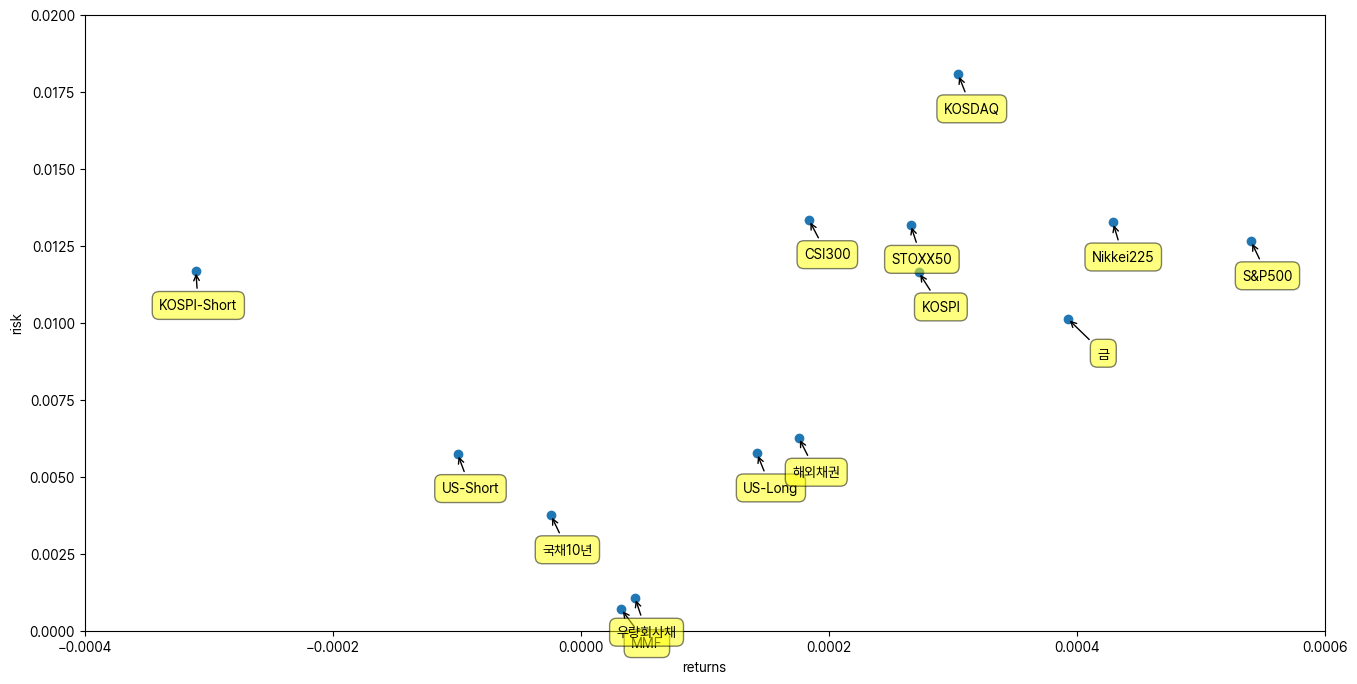

In [20]:
plt.figure(figsize=(16,8))
plt.scatter(changes.mean(), changes.std())
plt.xlabel('returns')
plt.ylabel('risk')
plt.xlim(-0.0004, 0.0006)
plt.ylim(0, 0.02)
plt.tight_layout
for label, x, y in zip(changes.columns, changes.mean(), changes.std()):
    plt.annotate( label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

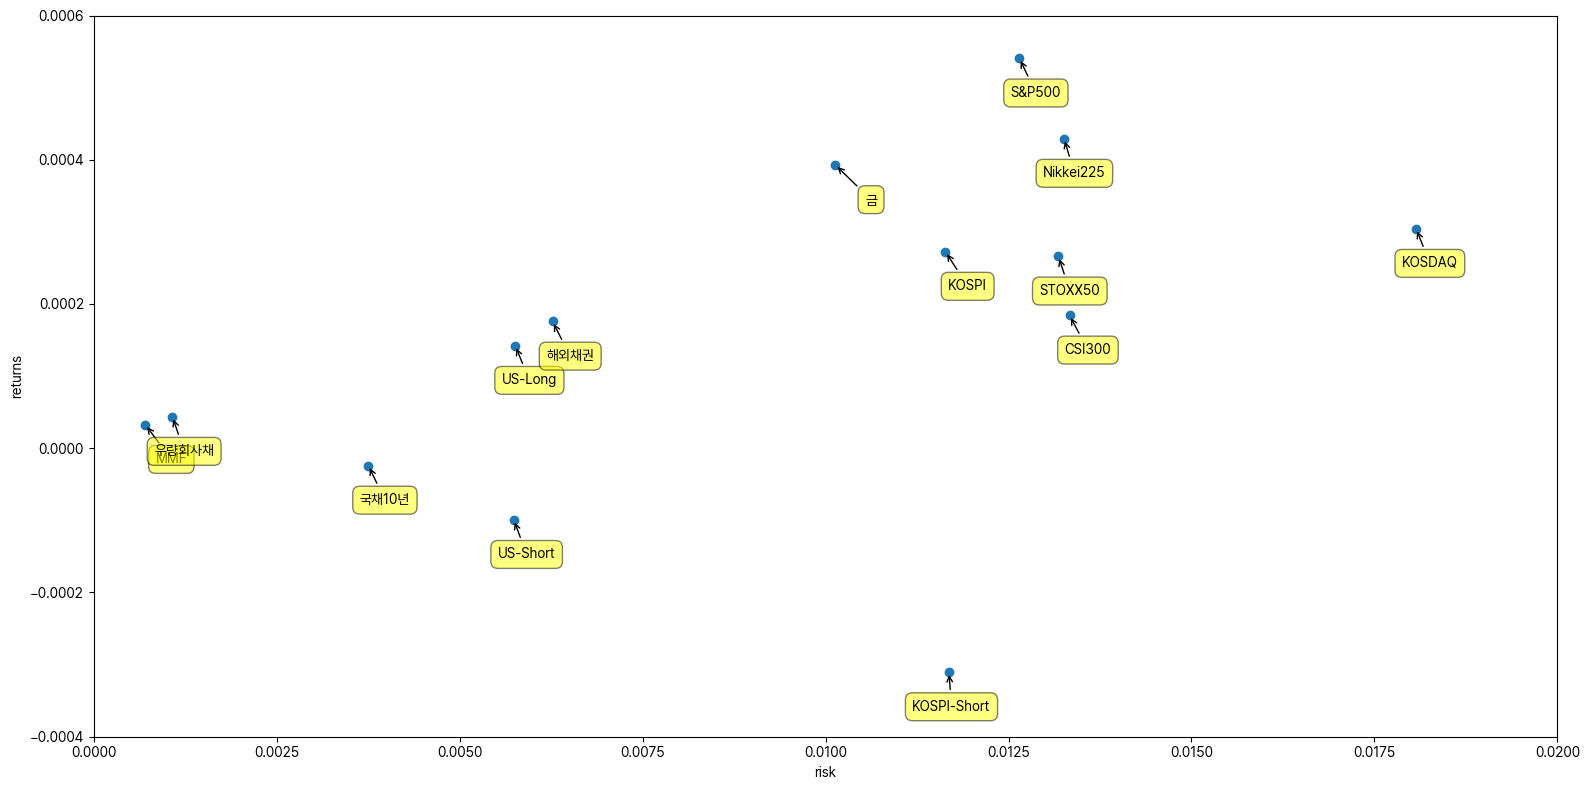

In [21]:
plt.figure(figsize=(16, 8))
plt.scatter(changes.std(), changes.mean())  # Swap x and y values
plt.xlabel('risk')  # Change the x-axis label to 'risk'
plt.ylabel('returns')  # Change the y-axis label to 'returns'
plt.ylim(-0.0004, 0.0006)  # Adjust the limits for the y-axis
plt.xlim(0, 0.02)  # Adjust the limits for the x-axis
plt.tight_layout()

for label, x, y in zip(changes.columns, changes.std(), changes.mean()):  # Swap x and y values
    plt.annotate(label, xy=(x, y), xytext=(30, -30),
                 textcoords='offset points',
                 ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()
